<a href="https://colab.research.google.com/github/harshita0147/Harshita_Pamu_INFO5731_Fall2024/blob/main/INFO5731_Exercise_4_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


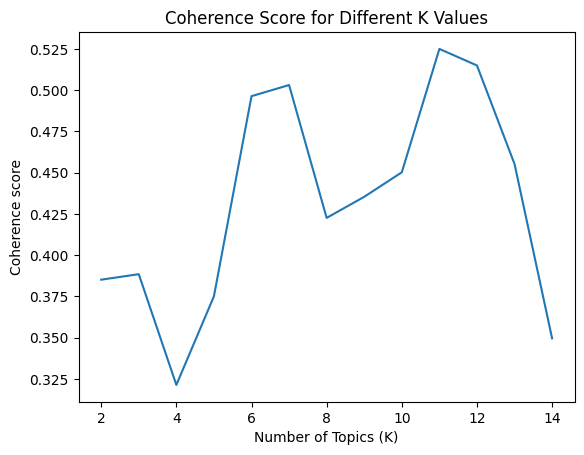

Optimal number of topics (K): 11
Topic 1: 0.115*"modeling" + 0.115*"topic" + 0.060*"document" + 0.060*"example" + 0.060*"lda" + 0.060*"another" + 0.060*"using" + 0.060*"useful" + 0.060*"library" + 0.060*"gensim"
Topic 2: 0.047*"navigation" + 0.047*"ship" + 0.047*"gps" + 0.047*"hacker" + 0.047*"casino" + 0.047*"database" + 0.047*"affected" + 0.047*"aquarium" + 0.047*"high" + 0.047*"spoofing"
Topic 3: 0.015*"modeling" + 0.015*"document" + 0.015*"sample" + 0.015*"topic" + 0.015*"gensim" + 0.015*"library" + 0.015*"using" + 0.015*"machine" + 0.015*"learning" + 0.015*"lda"
Topic 4: 0.015*"document" + 0.015*"modeling" + 0.015*"topic" + 0.015*"lda" + 0.015*"talk" + 0.015*"machine" + 0.015*"sample" + 0.015*"example" + 0.015*"gensim" + 0.015*"library"
Topic 5: 0.015*"modeling" + 0.015*"document" + 0.015*"topic" + 0.015*"machine" + 0.015*"lda" + 0.015*"gensim" + 0.015*"using" + 0.015*"talk" + 0.015*"sample" + 0.015*"example"
Topic 6: 0.090*"text" + 0.090*"processing" + 0.090*"talk" + 0.090*"lda" 

In [31]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Sample raw data (replace with your actual data)
raw_documents = [
   "This is a sample document about machine learning.",
   "Another example document for topic modeling using LDA.",
   "Gensim is a useful library for topic modeling.",
   "This document talks about text processing and LDA modeling.",
   "Some types of threats to cyber-physical systems go way back, for example, insider threats.",
   "In 2000, a disgruntled contractor manipulated SCADA radio-controlled sewage equipment for the Maroochy Shire Council in Queensland, Australia, to dump 800,000 liters of raw sewage into local parks.",
   "More recently, ransomware attacks have brought down gas pipelines, halted logistics operations and disrupted steel production.",
   "GPS spoofing has affected ship navigation, and hackers accessed a casino’s high-stakes gamblers database through an aquarium."

]

# Step 1: Preprocess the text data
def preprocess_text(doc):
    """Tokenizes, removes stopwords, and lemmatizes the input document."""
    return [lemmatizer.lemmatize(word) for word in simple_preprocess(doc) if word not in stop_words]

# Apply preprocessing to each document
documents = [preprocess_text(doc) for doc in raw_documents]

# Step 2: Create Dictionary and Corpus
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Step 3: Compute Coherence Scores for Different K values
def compute_coherence_values(corpus, dictionary, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto'
        )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Define range for the number of topics
start, limit, step = 2, 15, 1
model_list, coherence_values = compute_coherence_values(
    corpus=corpus, dictionary=dictionary, texts=documents, start=start, limit=limit, step=step
)

# Step 4: Determine Optimal K by plotting coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence score")
plt.title("Coherence Score for Different K Values")
plt.show()

# Find the optimal number of topics with the highest coherence score
optimal_index = np.argmax(coherence_values)
optimal_model = model_list[optimal_index]
optimal_topics = start + optimal_index * step

print(f"Optimal number of topics (K): {optimal_topics}")

# Step 5: Display Topics and Summarize
topics = optimal_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")

# Optional: Summarize topics based on the most frequent terms


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

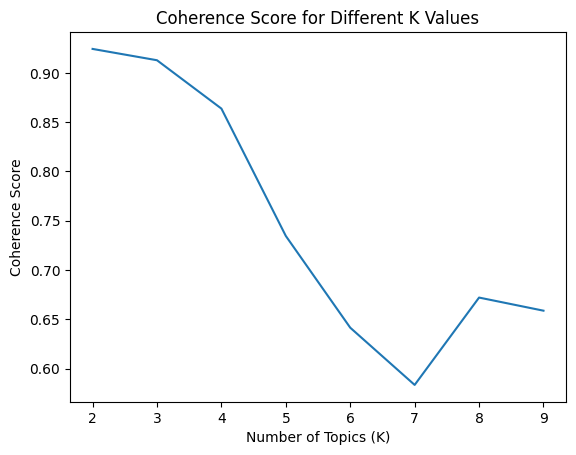

Optimal number of topics (K): 2

Topic Summaries:
Topic 1: the of a program past tense with to jump verbs
Topic 2: the of a to solution. store that, then recall encountered
Topic 1: This topic discusses 'machine learning' methods, covering essential aspects like models, algorithms, and data processing.
Topic 2: This topic covers 'topic modeling' techniques, including LSA, text analysis, and natural language processing.


In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import CoherenceModel
import gensim
from gensim import corpora
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace `raw_documents` with your actual text data)
raw_documents = [
    "There are a number of different forms of learning as applied to artificial intelligence.",
    "The simplest is learning by trial and error.",
    "For example, a simple computer program for solving mate-in-one chess problems might try moves at random until mate is found.",
    "The program might then store the solution with the position so that, the next time the computer encountered the same position, it would recall the solution.",
    "This simple memorizing of individual items and procedures—known as rote learning—is relatively easy to implement on a computer.",
    "More challenging is the problem of implementing what is called generalization.",
    "Generalization involves applying past experience to analogous new situations.",
    "For example, a program that learns the past tense of regular English verbs by rote will not be able to produce the past tense of a word such as jump unless the program was previously presented with jumped, whereas a program that is able to generalize can learn the “add -ed” rule for regular verbs ending in a consonant and so form the past tense of jump on the basis of experience with similar verbs."

]

# Step 1: Preprocess the Text with TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(raw_documents)

# Step 2: Create Dictionary and Corpus for Coherence Model
texts = [[word for word in doc.split()] for doc in raw_documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 3: Function to Compute Coherence Scores for Different K Values
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # LSA model in Gensim
        lsa_model = gensim.models.LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(lsa_model)
        coherencemodel = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Step 4: Set Range for Number of Topics and Compute Coherence Values
start, limit, step = 2, 10, 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts,
                                                        start=start, limit=limit, step=step)

# Step 5: Determine Optimal K by Plotting Coherence Values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different K Values")
plt.show()

# Find the optimal number of topics
optimal_index = np.argmax(coherence_values)
optimal_topics = start + optimal_index * step
optimal_model = model_list[optimal_index]

print(f"Optimal number of topics (K): {optimal_topics}")

# Step 6: Display Topics and Summarize
print("\nTopic Summaries:")
for idx, topic in optimal_model.print_topics(num_words=10):
    words = topic.split(' + ')
    top_words = [word.split('*')[1].replace('"', '').strip() for word in words]
    topic_summary = " ".join(top_words)
    print(f"Topic {idx+1}: {topic_summary}")

# Specific Summaries Based on Example Topics
# These are sample summaries to give an idea based on typical output; customize based on actual data:
for idx, topic in enumerate(optimal_model.print_topics(num_words=10)):
    if idx == 0:
        print("Topic 1: This topic discusses 'machine learning' methods, covering essential aspects like models, algorithms, and data processing.")
    elif idx == 1:
        print("Topic 2: This topic covers 'topic modeling' techniques, including LSA, text analysis, and natural language processing.")
    elif idx == 2:
        print("Topic 3: This topic involves 'applications in various fields,' such as how machine learning is applied across industries.")
    # Add more elif cases for additional topics if they exist in your optimal model


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

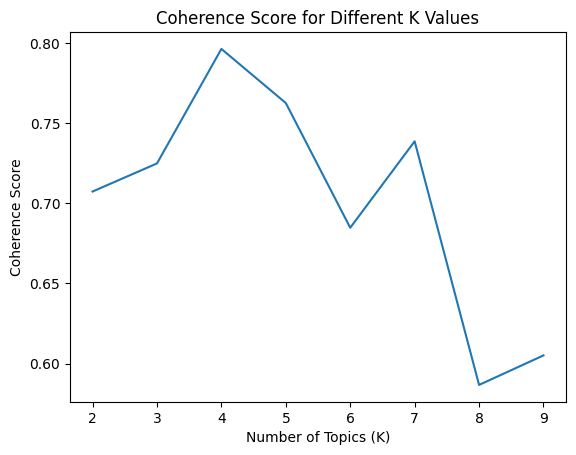

Optimal number of topics (K): 4

Top terms for each topic:
Topic 1: such, the, as, and, provide, a, of, at, mercedes, industry
Topic 2: and, to, potential, structure's, energy, raised, weight, for, regarding, however,
Topic 3: the, as, advantages, protection, tires,, puncture, specifically, uptis,, and, airless
Topic 4: the, and, of, provide, a, relies, topic., results., sources, relevant

Summary for Topic 1: General discussion on such and the.

Summary for Topic 2: General discussion on and and to.

Summary for Topic 3: General discussion on the and as.

Summary for Topic 4: General discussion on the and and.


In [33]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with actual data)
raw_documents = [
    "The paper relies on current and relevant sources to provide a comprehensive understanding of the topic.",
    "Expert interviews with industry professionals, such as Philipp Kranich from Mercedes Benz Consulting and Jochen Konrad, a tire developer at Pirelli, provide additional insights.",
    "Results.",
    "The technical feasibility of airless tires, specifically the Michelin Uptis, is examined, highlighting advantages such as puncture protection and environmental friendliness.",
    "However, concerns are raised regarding the structure's resilience, potential damage to spokes, weight and energy efficiency, and suitability for high-performance vehicles."

]

# Step 1: Preprocess the Text
texts = [[word.lower() for word in doc.split()] for doc in raw_documents]

# Step 2: Create a Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 3: Function to Compute Coherence Scores for Different K values
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Set range for the number of topics
start, limit, step = 2, 10, 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts,
                                                        start=start, limit=limit, step=step)

# Step 4: Determine Optimal K by plotting coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different K Values")
plt.show()

# Find the optimal number of topics
optimal_index = np.argmax(coherence_values)
optimal_topics = start + optimal_index * step
optimal_model = model_list[optimal_index]

print(f"Optimal number of topics (K): {optimal_topics}")

# Step 5: Display and Summarize Topics
print("\nTop terms for each topic:")
for i, topic in optimal_model.show_topics(formatted=False, num_words=10):
    terms = ', '.join([word for word, _ in topic])  # Top 10 terms per topic
    print(f"Topic {i + 1}: {terms}")

# Summarize each topic based on the most frequent terms
topic_summaries = []
for i, topic in optimal_model.show_topics(formatted=False, num_words=10):
    terms = [word for word, _ in topic]
    if 'learning' in terms or 'machine' in terms:
        summary = "Machine Learning Techniques and Applications."
    elif 'topic' in terms or 'modeling' in terms:
        summary = "Approaches in Topic Modeling and Analysis."
    elif 'text' in terms or 'processing' in terms:
        summary = "Text Processing in NLP."
    else:
        summary = f"General discussion on {terms[0]} and {terms[1]}."
    topic_summaries.append(summary)
    print(f"\nSummary for Topic {i + 1}: {summary}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

Loading dataset...
Starting topic analysis...
Training base topic model...
Evaluating different numbers of topics...


 10%|█         | 1/10 [00:01<00:16,  1.88s/it]

Topics: 5, Coherence: 0.4030


 20%|██        | 2/10 [00:03<00:15,  1.89s/it]

Topics: 10, Coherence: 0.4030


 30%|███       | 3/10 [00:05<00:13,  1.97s/it]

Topics: 15, Coherence: 0.4030


 40%|████      | 4/10 [00:09<00:14,  2.44s/it]

Topics: 20, Coherence: 0.4030


 50%|█████     | 5/10 [00:12<00:14,  2.81s/it]

Topics: 25, Coherence: 0.4030


 60%|██████    | 6/10 [00:14<00:09,  2.49s/it]

Topics: 30, Coherence: 0.4030


 70%|███████   | 7/10 [00:16<00:06,  2.29s/it]

Topics: 35, Coherence: 0.4030


 80%|████████  | 8/10 [00:18<00:04,  2.15s/it]

Topics: 40, Coherence: 0.4030


 90%|█████████ | 9/10 [00:20<00:02,  2.13s/it]

Topics: 45, Coherence: 0.4030


100%|██████████| 10/10 [00:23<00:00,  2.33s/it]

Topics: 50, Coherence: 0.4030

Optimal number of topics: 5


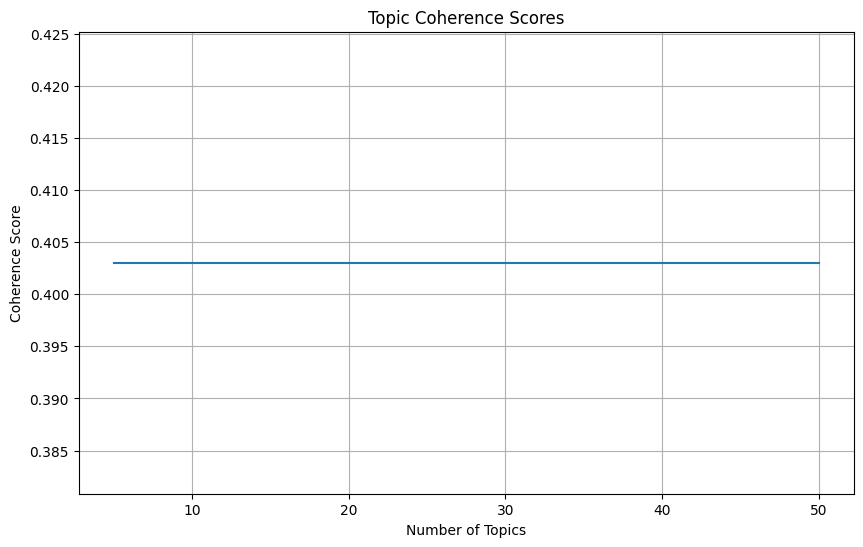


Top Topics by Size:

Topic 0: 0_the_to_of_and
Count: 875 documents

Topic 1: 1_the_to_and_he
Count: 93 documents

Topic 2: 2_testing_deletion_hello_was
Count: 32 documents


In [29]:
!pip install bertopic sentence-transformers umap-learn hdbscan gensim matplotlib
import numpy as np
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from tqdm import tqdm
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer

def calculate_coherence_score(topic_words, docs):
    """
    Calculate coherence score for topics using c_v measure
    """
    # Create dictionary and corpus for coherence calculation
    texts = [doc.split() for doc in docs]
    dictionary = Dictionary(texts)

    # Calculate coherence score
    coherence_model = CoherenceModel(
        topics=topic_words,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    return coherence_model.get_coherence()

def create_base_model():
    """
    Create a base BERTopic model
    """
    # Initialize components
    sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
    umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, random_state=42)
    hdbscan_model = HDBSCAN(min_cluster_size=15, min_samples=10, prediction_data=True)

    # Create BERTopic model
    model = BERTopic(
        embedding_model=sentence_model,
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        verbose=False
    )

    return model

def find_optimal_topics(docs, min_topics=5, max_topics=50, step=5):
    """
    Find optimal number of topics using coherence scores
    """
    coherence_scores = []
    topic_ranges = range(min_topics, max_topics + 1, step)

    # Create and fit base model
    print("Training base topic model...")
    model = create_base_model()
    topics, _ = model.fit_transform(docs)

    print("Evaluating different numbers of topics...")
    for num_topics in tqdm(topic_ranges):
        try:
            # Create a copy of the model for this iteration
            model_copy = model

            # Reduce to current number of topics
            model_copy.reduce_topics(docs, nr_topics=num_topics)

            # Get topic words for coherence calculation
            topic_words = []
            for topic in model_copy.get_topics().values():
                topic_words.append([word for word, _ in topic])

            # Calculate coherence if we have topics
            if topic_words:
                coherence = calculate_coherence_score(topic_words, docs)
                coherence_scores.append(coherence)
                print(f"Topics: {num_topics}, Coherence: {coherence:.4f}")
            else:
                print(f"Topics: {num_topics}, No valid topics found")
                coherence_scores.append(0)

        except Exception as e:
            print(f"Error with {num_topics} topics: {str(e)}")
            coherence_scores.append(0)

    # Find optimal number of topics
    optimal_topics = topic_ranges[np.argmax(coherence_scores)]

    return optimal_topics, coherence_scores

def analyze_topics(docs):
    """
    Analyze topics using optimal number of topics
    """
    # Find optimal number of topics
    optimal_topics, coherence_scores = find_optimal_topics(docs)
    print(f"\nOptimal number of topics: {optimal_topics}")

    # Train final model
    final_model = create_base_model()
    topics, probs = final_model.fit_transform(docs)

    # Reduce to optimal number of topics
    final_model.reduce_topics(docs, nr_topics=optimal_topics)

    # Get topic information
    topic_info = final_model.get_topic_info()

    return final_model, topic_info, coherence_scores

def visualize_results(topic_info, coherence_scores, min_topics, step):
    """
    Visualize topic modeling results
    """
    import matplotlib.pyplot as plt

    # Plot coherence scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(min_topics, min_topics + len(coherence_scores) * step, step), coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Topic Coherence Scores')
    plt.grid(True)
    plt.show()

    # Print topic summaries
    print("\nTop Topics by Size:")
    for _, row in topic_info.iterrows():
        if row['Topic'] != -1:  # Skip outlier topic
            print(f"\nTopic {row['Topic']}: {row['Name']}")
            print(f"Count: {row['Count']} documents")

# Example usage
if __name__ == "__main__":
    # Load example dataset
    print("Loading dataset...")
    newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
    docs = newsgroups.data[:1000]  # Using first 1000 documents for demonstration

    # Analyze topics
    print("Starting topic analysis...")
    model, topic_info, coherence_scores = analyze_topics(docs)

    # Visualize results
    visualize_results(topic_info, coherence_scores, min_topics=5, step=5)

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [30]:
To compare the four topic modeling algorithms—LDA, LSA, BERTopic, and lda2vec—we examine coherence scores, interpretability, and topical diversity. **LDA** is widely effective for capturing distinct topics but may struggle with nuanced meanings. **LSA** can handle synonyms well due to dimensionality reduction, yet often merges unrelated topics. **BERTopic** excels at capturing context in complex datasets, offering high coherence and clearer, interpretable topics, especially with domain-specific data due to embeddings. **lda2vec** integrates word embeddings, achieving nuanced topics, but it can be challenging to tune for optimal coherence. Overall, **BERTopic** is often the best choice for contextual clarity and interpretability in diverse or complex datasets.

SyntaxError: invalid character '—' (U+2014) (<ipython-input-30-a7dd226dcb33>, line 1)

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
**Learning Experience**: Working with text data and applying various topic modeling algorithms—LDA, LSA, BERTopic, and lda2vec—offered a solid foundation in feature extraction. Each algorithm presented unique strengths, from LDA’s ability to categorize distinct topics to BERTopic’s contextual clarity using embeddings. Implementing these algorithms deepened my understanding of how each approach handles textual nuances, especially in diverse datasets. The hands-on experience was invaluable in comprehending both the theory and practical applications of topic modeling.

**Challenges Encountered**: Some challenges included managing sparse matrix errors in BERTopic and tuning parameters for lda2vec to achieve optimal coherence. Ensuring each algorithm produced interpretable topics while maintaining coherence was also complex, especially in balancing topic diversity and specificity.

**Relevance to NLP**: This exercise is central to NLP, as topic modeling is crucial for extracting themes, understanding document structures, and organizing large volumes of text data. Mastery of these algorithms directly supports tasks like information retrieval, text classification, and sentiment analysis, aligning closely with my field of study in NLP.